In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

**Dataset Columns:**  
CALENDAR_ID: Identifier for the date  
SERVICE_ABBR: Service Type. indicates the schedule type operating that day. 1 = Weekday, 2 = Saturday, 3 = Sunday. Normally this corresponds to the day of the week, but sometimes Saturday or Sunday service will run on a weekday (i.e. during a holiday).  
ADHERENCE_ID: Unique identifier for each record  
DATE: Trip date  
ROUTE_ABBR: Route identifier. Routes can be found here https://www.wegotransit.com/ride/maps-schedules/bus/. For example, Route 55 is Murfreesboro Pike  
BLOCK_ABBR: Indicates the section (block) of the route that the given stop is on  
OPERATOR: Indicates the operator (driver)  
TRIP_ID: Identifies the trip; Note that a TRIP_ID is reused for the a given route and scheduled time, so it does not uniquely identify a trip, but can be used in combination with the CALENDAR_ID.  
OVERLOAD_ID: signifies that the record is from a trip that was added by the dispatcher and was not part of the original schedule for the day. Usually, these are created when one vehicle breaks down and another is covering the same service. As far as the actual value, 0 means that this record was part of the original schedule, and anything other than 0 means it was added.  
ROUTE_DIRECTION_NAME: Which direction the trip is going; Either to downtown or from downtown  
TIME_POINT_ABBR: Identifies the time point of the record.  
ROUTE_STOP_SEQUENCE: Identifies the stop point.  
TRIP_EDGE: defines whether the stop is the first one on the trip (1), an intermediate stop (0), or the last one on a trip (2)  
LATITUDE/LONGITUDE: Location in lat/long  
SCHEDULED_TIME: Scheduled stop time  
ACTUAL_ARRIVAL_TIME: actual arrival time  
ACTUAL_DEPARTURE_TIME: actual departure time  
ADHERENCE: Difference between actual departure time and scheduled time; negative indicates departure time after scheduled time and positive indicates departure time before scheduled time. Generally, on-time is considered to be no more than 6 minutes lates and no more than one minute early, but there are some exceptions to these cutoffs. Whether or not a bus is on-time can be determined by looking at the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.  
SCHEDULED_HDWY: Scheduled headway in minutes for the given timepoint crossing record; headway is the difference between the scheduled_time and the previous scheduled time for that stop  
ACTUAL_HDWY: Actual headway  
HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping)  
ADJUSTED_EARLY_COUNT: An indicator for if the bus is considered to be early  
ADJUSTED_LATE_COUNT: An indicator for if the bus is considered to be late  
ADJUSTED_ONTIME_COUNT: An indicator for if the bus is considered to be on time  
STOP_CANCELLED:	flags whether a crossing was canceled or waived  
PREV_SCHED_STOP_CANCELLED: flags whether the previous timepoint crossing was cancelled or waived. Useful for excluding records where the headway values are extremely high because the bus is just coming off a detour  
IS_RELIEF: flags whether a particular crossing is a relief - i.e. the first timepoint crossing of a new driver on the bus/block  
DWELL_IN_MINS: Actual Departure Time - Actual Arrival Time (in minutes)  
SCHEDULED_LAYOVER_MINUTES: Applies only for TRIP_EDGE 1 (the beginning of a trip). Tells how much time between the scheduled time at the end of the previous trip and the current trip. 


In [4]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [5]:
wego.dropna()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,...,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,...,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,...,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,...,62.733333,-0.266667,0,0,1,0,0.0,0,12.250000,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,...,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,...,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,...,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,...,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0


In [6]:
wego.shape

(350329, 30)

1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

<Axes: xlabel='ROUTE_ABBR', ylabel='ADHERENCE'>

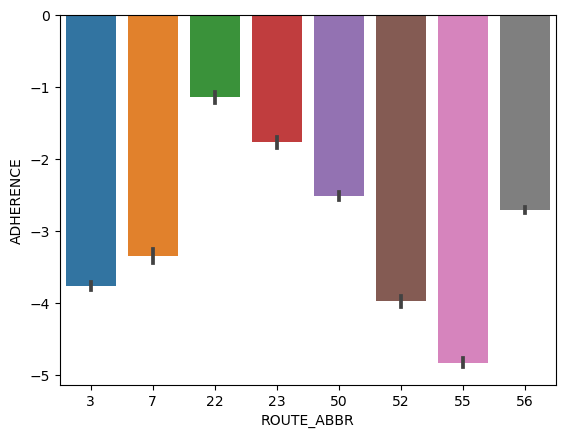

In [7]:
sns.barplot(x=wego['ROUTE_ABBR'], y=wego['ADHERENCE'])

In [8]:
df1 = wego[wego['TRIP_EDGE'] != 2]

<Axes: xlabel='ROUTE_ABBR', ylabel='ADHERENCE'>

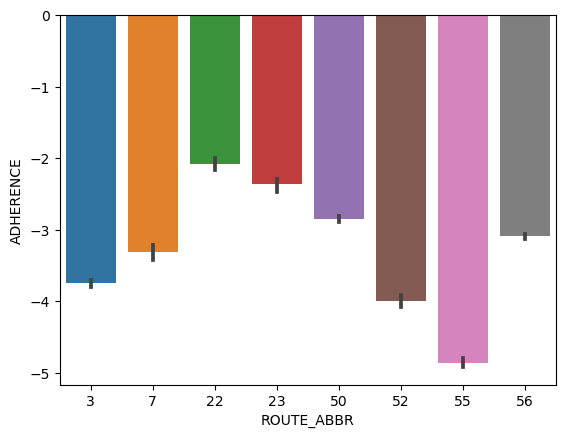

In [9]:
sns.barplot(x=df1['ROUTE_ABBR'], y=df1['ADHERENCE'])

In [10]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

In [11]:
wego1 = wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']]

In [12]:
wego.groupby('ROUTE_ABBR')['ADHERENCE'].describe().reset_index()

,ROUTE_ABBR,count,mean,std,min,25%,50%,75%,max
0,3,45488.0,-3.761491,5.415910,-133.250000,-5.350000,-2.566666,-0.766666,33.750000
1,7,17267.0,-3.346555,6.669753,-87.716666,-4.916666,-2.116666,-0.616666,88.383333
2,22,25188.0,-1.138107,6.391798,-675.000000,-2.950000,-0.933333,0.816666,24.733333
3,23,39653.0,-1.760110,7.680491,-618.166666,-3.116666,-1.316666,0.033333,33.633333
4,50,42629.0,-2.505022,6.159666,-489.316666,-3.883333,-1.800000,-0.300000,22.350000
5,52,49327.0,-3.971342,8.721732,-948.533333,-5.016666,-2.066666,-0.400000,30.200000
6,55,60359.0,-4.823302,7.535092,-375.233333,-6.583333,-2.883333,-0.850000,40.250000
7,56,58950.0,-2.703988,4.931009,-322.783333,-4.300000,-1.900000,-0.283333,39.916666


In [13]:
#wego.groupby('ROUTE_ABBR')['ADHERENCE'].value_counts().reset_index()

In [14]:
wego_1 = wego[(wego['ADJUSTED_ONTIME_COUNT'] == 1)]

In [15]:
wego_1 = wego_1[['DATE', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADJUSTED_ONTIME_COUNT']]

In [16]:
wego_1

,DATE,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADJUSTED_ONTIME_COUNT
0,2023-08-01,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,1
1,2023-08-01,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,1
2,2023-08-01,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,1
3,2023-08-01,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,1
4,2023-08-01,22,MCC5_10,1,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,1
...,...,...,...,...,...,...,...,...
350315,2023-09-30,7,21BK,0,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,1
350316,2023-09-30,7,HBHS,2,2023-09-30 21:11:00,2023-09-30 21:12:40,2023-09-30 21:12:40,1
350317,2023-09-30,7,HBHS,1,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,1
350320,2023-09-30,7,MCC5_9,1,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,1


In [17]:
wego_1 = wego_1.groupby('ROUTE_ABBR').count()

In [18]:
#wego_1 = wego_1['TRIP_EDGE'].value_counts()

In [19]:
wego_1 = wego_1['DATE']

In [20]:
wego_1.reset_index()

,ROUTE_ABBR,DATE
0,3,34516
1,7,13417
2,22,22492
3,23,35137
4,50,36309
5,52,37736
6,55,42080
7,56,48361


In [21]:
#sns.barplot(x=wego['ROUTE_ABBR'], y=wego['ADJUSTED_ONTIME_COUNT'] == 1)

In [22]:
wego_total = wego.groupby('ROUTE_ABBR').count()

In [23]:
wego_total = wego_total['DATE']

In [24]:
wego_total.info()

<class 'pandas.core.series.Series'>
Index: 8 entries, 3 to 56
Series name: DATE
Non-Null Count  Dtype
--------------  -----
8 non-null      int64
dtypes: int64(1)
memory usage: 128.0 bytes


In [25]:
wego_total.reset_index()

,ROUTE_ABBR,DATE
0,3,47162
1,7,18026
2,22,25959
3,23,42108
4,50,43291
5,52,51819
6,55,61944
7,56,60020


In [26]:
On_time_percent = (wego_1/wego_total) * 100

In [27]:
On_time_percent = On_time_percent.reset_index()

In [28]:
On_time_percent = On_time_percent.rename(columns={'DATE': 'On_Time_Percent'})

In [29]:
On_time_percent

,ROUTE_ABBR,On_Time_Percent
0,3,73.186040
1,7,74.431377
2,22,86.644324
3,23,83.444951
4,50,83.871936
5,52,72.822710
6,55,67.932326
7,56,80.574808


In [30]:
#wego_total = wego['ROUTE_ABBR'].value_counts().sort_index()

In [31]:
#wego_total = wego_total.astype(int)

In [32]:
#wego_1 = wego_1[''].value_counts().sort_index()

In [33]:
#sns.barplot(x=wego['ROUTE_ABBR'], y=wego['HDWY_DEV'])

In [34]:
#wego_late = wego[(wego['ADJUSTED_ONTIME_COUNT'] != 1)]

In [35]:
#wego_late = wego_late[['DATE', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADJUSTED_ONTIME_COUNT']]

In [36]:
#wego_late

In [37]:
#sns.barplot(x=wego['ROUTE_ABBR'], y=wego['ADJUSTED_ONTIME_COUNT'] != 1)

3. How does time of day or day of week affect headway and on-time performance?

In [38]:
#wego_3 = wego[['ROUTE_ABBR','DATE','SCHEDULED_TIME', 'CALENDAR_ID', 'ACTUAL_HDWY','HDWY_DEV','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT','ADJUSTED_ONTIME_COUNT']]

In [39]:
wego_3 = wego[['ROUTE_ABBR','DATE','SCHEDULED_TIME','ACTUAL_HDWY','HDWY_DEV','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT','ADJUSTED_ONTIME_COUNT']]

In [40]:
wego_3

,ROUTE_ABBR,DATE,SCHEDULED_TIME,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,22,2023-08-01,2023-08-01 04:42:00,NaN,NaN,0,0,1
1,22,2023-08-01,2023-08-01 04:46:00,NaN,NaN,0,0,1
2,22,2023-08-01,2023-08-01 04:54:00,NaN,NaN,0,0,1
3,22,2023-08-01,2023-08-01 05:10:00,NaN,NaN,0,0,1
4,22,2023-08-01,2023-08-01 05:15:00,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...
350324,7,2023-09-30,2023-09-30 22:23:00,35.266666,5.266666,0,1,0
350325,7,2023-09-30,2023-09-30 22:38:00,NaN,NaN,0,1,0
350326,7,2023-09-30,2023-09-30 22:45:00,31.866666,1.866666,0,0,1
350327,7,2023-09-30,2023-09-30 22:59:00,47.500000,17.500000,0,1,0


In [41]:
wego_3[['Date_2', 'TIME']] = wego_3['SCHEDULED_TIME'].str.split(' ', expand=True)

/var/folders/m_/mtd6n2f104s3kc51kg62y0_r0000gn/T/ipykernel_9532/321507234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_3[['Date_2', 'TIME']] = wego_3['SCHEDULED_TIME'].str.split(' ', expand=True)
/var/folders/m_/mtd6n2f104s3kc51kg62y0_r0000gn/T/ipykernel_9532/321507234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_3[['Date_2', 'TIME']] = wego_3['SCHEDULED_TIME'].str.split(' ', expand=True)


In [42]:
wego_3

,ROUTE_ABBR,DATE,SCHEDULED_TIME,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,Date_2,TIME
0,22,2023-08-01,2023-08-01 04:42:00,NaN,NaN,0,0,1,2023-08-01,04:42:00
1,22,2023-08-01,2023-08-01 04:46:00,NaN,NaN,0,0,1,2023-08-01,04:46:00
2,22,2023-08-01,2023-08-01 04:54:00,NaN,NaN,0,0,1,2023-08-01,04:54:00
3,22,2023-08-01,2023-08-01 05:10:00,NaN,NaN,0,0,1,2023-08-01,05:10:00
4,22,2023-08-01,2023-08-01 05:15:00,NaN,NaN,0,0,1,2023-08-01,05:15:00
...,...,...,...,...,...,...,...,...,...,...
350324,7,2023-09-30,2023-09-30 22:23:00,35.266666,5.266666,0,1,0,2023-09-30,22:23:00
350325,7,2023-09-30,2023-09-30 22:38:00,NaN,NaN,0,1,0,2023-09-30,22:38:00
350326,7,2023-09-30,2023-09-30 22:45:00,31.866666,1.866666,0,0,1,2023-09-30,22:45:00
350327,7,2023-09-30,2023-09-30 22:59:00,47.500000,17.500000,0,1,0,2023-09-30,22:59:00


In [43]:
wego_3 = wego_3.drop(['Date_2'], axis=1)

In [44]:
wego_3 = wego_3.drop(['SCHEDULED_TIME'], axis=1)

In [45]:
wego_3.head()

,ROUTE_ABBR,DATE,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,TIME
0,22,2023-08-01,NaN,NaN,0,0,1,04:42:00
1,22,2023-08-01,NaN,NaN,0,0,1,04:46:00
2,22,2023-08-01,NaN,NaN,0,0,1,04:54:00
3,22,2023-08-01,NaN,NaN,0,0,1,05:10:00
4,22,2023-08-01,NaN,NaN,0,0,1,05:15:00


In [46]:
wego_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ROUTE_ABBR             350329 non-null  int64  
 1   DATE                   350329 non-null  object 
 2   ACTUAL_HDWY            266062 non-null  float64
 3   HDWY_DEV               265893 non-null  float64
 4   ADJUSTED_EARLY_COUNT   350329 non-null  int64  
 5   ADJUSTED_LATE_COUNT    350329 non-null  int64  
 6   ADJUSTED_ONTIME_COUNT  350329 non-null  int64  
 7   TIME                   350329 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 21.4+ MB


In [47]:
#filtered_df = wego_3[(wego_3['TIME'] > '04:00:00') & (wego_3['TIME'] <= '06:00:00')]

In [48]:
#filtered_df

In [49]:
#wego_3_late = wego_3[(wego_3['ADJUSTED_LATE_COUNT'] >= 1)]

In [50]:
#wego_3_late_22 = wego_3_late[(wego_3_late['ROUTE_ABBR'] == 22)]

In [51]:
#make 3 histigram count of stops on time (maybe windows of time).

In [52]:
#plt.hist('wego_3_late_22')

In [53]:
wego_3['TIME'] = wego_3['TIME'].astype('datetime64[ns]')

/var/folders/m_/mtd6n2f104s3kc51kg62y0_r0000gn/T/ipykernel_9532/4049567085.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wego_3['TIME'] = wego_3['TIME'].astype('datetime64[ns]')


In [54]:
wego_3

,ROUTE_ABBR,DATE,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,TIME
0,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:42:00
1,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:46:00
2,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:54:00
3,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 05:10:00
4,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 05:15:00
...,...,...,...,...,...,...,...,...
350324,7,2023-09-30,35.266666,5.266666,0,1,0,2024-09-19 22:23:00
350325,7,2023-09-30,NaN,NaN,0,1,0,2024-09-19 22:38:00
350326,7,2023-09-30,31.866666,1.866666,0,0,1,2024-09-19 22:45:00
350327,7,2023-09-30,47.500000,17.500000,0,1,0,2024-09-19 22:59:00


In [55]:
wego_3['HOUR'] = wego_3['TIME'].dt.hour

In [56]:
wego_3_early = wego_3.groupby('HOUR')['ADJUSTED_EARLY_COUNT'].sum()

In [57]:
#wego_3.plot.bar(stacked=True)

In [58]:
wego_3_early.reset_index()

,HOUR,ADJUSTED_EARLY_COUNT
0,0,358
1,1,26
2,4,70
3,5,371
4,6,540
5,7,528
6,8,415
7,9,594
8,10,751
9,11,570


In [59]:
wego_3_late = wego_3.groupby('HOUR')['ADJUSTED_LATE_COUNT'].sum()

In [60]:
wego_3_late.reset_index()

,HOUR,ADJUSTED_LATE_COUNT
0,0,791
1,1,28
2,4,39
3,5,426
4,6,1440
5,7,3609
6,8,4617
7,9,2675
8,10,2102
9,11,2255


In [61]:
wego_3_on_time = wego_3.groupby('HOUR')['ADJUSTED_ONTIME_COUNT'].sum()

In [62]:
wego_3_on_time.reset_index()

,HOUR,ADJUSTED_ONTIME_COUNT
0,0,2871
1,1,57
2,4,1581
3,5,9283
4,6,17359
5,7,17824
6,8,15603
7,9,16922
8,10,17100
9,11,17098


In [63]:
Wego_3__1 = pd.concat([wego_3_early, wego_3_late], axis=1, join="inner")

In [64]:
Wego_3__1

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
HOUR,,
0,358,791
1,26,28
4,70,39
5,371,426
6,540,1440
7,528,3609
8,415,4617
9,594,2675
10,751,2102


In [65]:
wego_3_2 = pd.concat([Wego_3__1,wego_3_on_time ], axis=1, join="inner")

In [66]:
wego_3_2

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
HOUR,,,
0,358,791,2871
1,26,28,57
4,70,39,1581
5,371,426,9283
6,540,1440,17359
7,528,3609,17824
8,415,4617,15603
9,594,2675,16922
10,751,2102,17100


<Axes: xlabel='HOUR'>

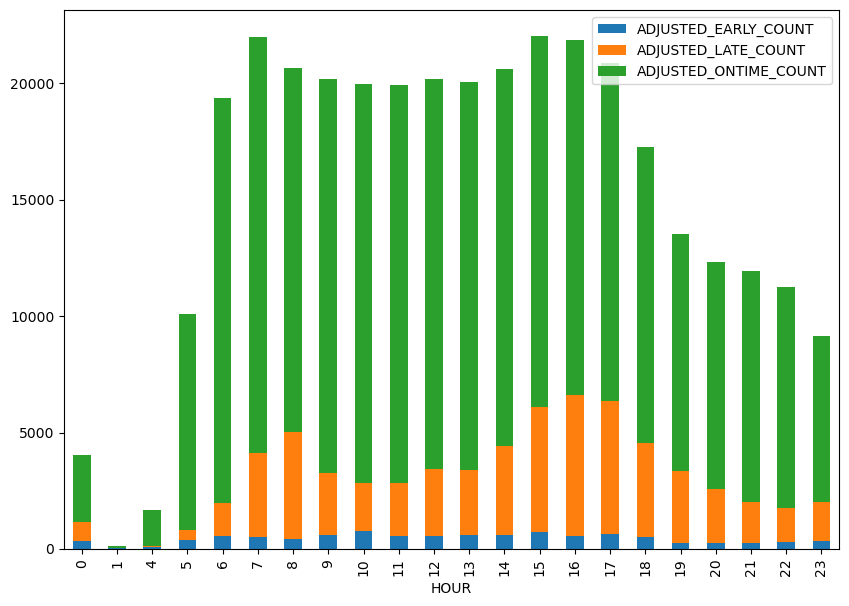

In [67]:
wego_3_2.plot.bar(stacked=True,figsize = ( 10 , 7 ))
#ax.xlabel( "Bus Times by Hour" , size = 12 ) 

In [68]:
wego_3

,ROUTE_ABBR,DATE,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,TIME,HOUR
0,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:42:00,4
1,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:46:00,4
2,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:54:00,4
3,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 05:10:00,5
4,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 05:15:00,5
...,...,...,...,...,...,...,...,...,...
350324,7,2023-09-30,35.266666,5.266666,0,1,0,2024-09-19 22:23:00,22
350325,7,2023-09-30,NaN,NaN,0,1,0,2024-09-19 22:38:00,22
350326,7,2023-09-30,31.866666,1.866666,0,0,1,2024-09-19 22:45:00,22
350327,7,2023-09-30,47.500000,17.500000,0,1,0,2024-09-19 22:59:00,22


In [69]:

wego_3['DATE'] = pd.to_datetime(wego_3['DATE'])

wego_3['DAYS'] = wego_3['DATE'].dt.day_name()


In [70]:
wego_3

,ROUTE_ABBR,DATE,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,TIME,HOUR,DAYS
0,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:42:00,4,Tuesday
1,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:46:00,4,Tuesday
2,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:54:00,4,Tuesday
3,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 05:10:00,5,Tuesday
4,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 05:15:00,5,Tuesday
...,...,...,...,...,...,...,...,...,...,...
350324,7,2023-09-30,35.266666,5.266666,0,1,0,2024-09-19 22:23:00,22,Saturday
350325,7,2023-09-30,NaN,NaN,0,1,0,2024-09-19 22:38:00,22,Saturday
350326,7,2023-09-30,31.866666,1.866666,0,0,1,2024-09-19 22:45:00,22,Saturday
350327,7,2023-09-30,47.500000,17.500000,0,1,0,2024-09-19 22:59:00,22,Saturday


In [71]:
wego_3_days_early = wego_3.groupby('DAYS')['ADJUSTED_EARLY_COUNT'].sum()
wego_3_days_late = wego_3.groupby('DAYS')['ADJUSTED_LATE_COUNT'].sum()
wego_3_days_on_time = wego_3.groupby('DAYS')['ADJUSTED_ONTIME_COUNT'].sum()

In [72]:
wego_3_3 = pd.concat([wego_3_days_early,wego_3_days_late ], axis=1, join="inner")

In [73]:
wego_3_6 = pd.concat([wego_3_3,wego_3_days_on_time ], axis=1, join="inner")

In [74]:
wego_3_6

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
DAYS,,,
Friday,1552,12389,41973
Monday,1665,6005,40319
Saturday,821,6747,28962
Sunday,847,3346,24253
Thursday,1570,10667,44030
Tuesday,1685,9587,45502
Wednesday,1635,10297,45009


<Axes: xlabel='DAYS'>

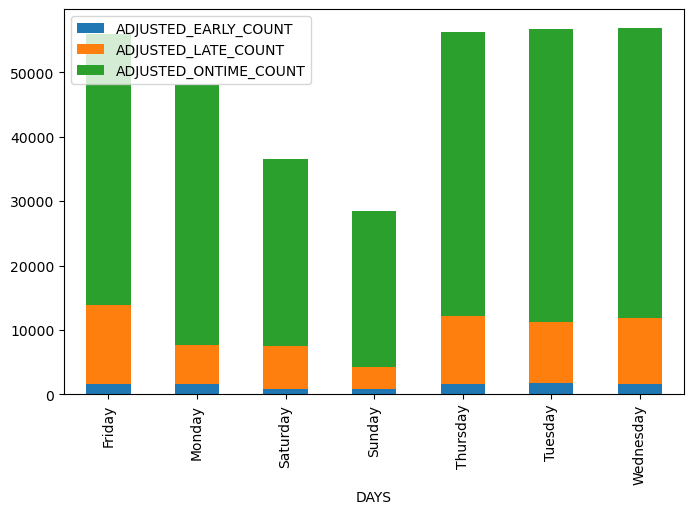

In [75]:
wego_3_6.plot.bar(stacked=True,figsize = ( 8 , 5 ))

In [76]:
# use headway percentage not actual headway. (headway dev / actual headway) * 100

In [77]:
wego_3['headway_percentage'] = (wego_3['HDWY_DEV'] / wego_3['ACTUAL_HDWY']) * 100

In [78]:
wego_3_headway_percent = wego_3[(wego_3['headway_percentage']>5)&(wego_3['headway_percentage']<15)]

In [79]:
wego_3_headway_percent.head()

,ROUTE_ABBR,DATE,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,TIME,HOUR,DAYS,headway_percentage
7,22,2023-08-01,37.666666,2.666666,0,0,1,2024-09-19 05:42:00,5,Tuesday,7.079644
8,22,2023-08-01,36.966666,1.966666,0,0,1,2024-09-19 05:46:00,5,Tuesday,5.320106
23,22,2023-08-01,16.000000,1.000000,0,0,1,2024-09-19 07:54:00,7,Tuesday,6.250000
49,22,2023-08-01,13.433333,1.433333,0,0,1,2024-09-19 12:14:00,12,Tuesday,10.669973
65,22,2023-08-01,13.933333,1.933333,0,0,1,2024-09-19 15:10:00,15,Tuesday,13.875596


In [80]:
wego_3_headway = wego_3_headway_percent.groupby('HOUR')['ACTUAL_HDWY'].sum()

<Axes: xlabel='HOUR'>

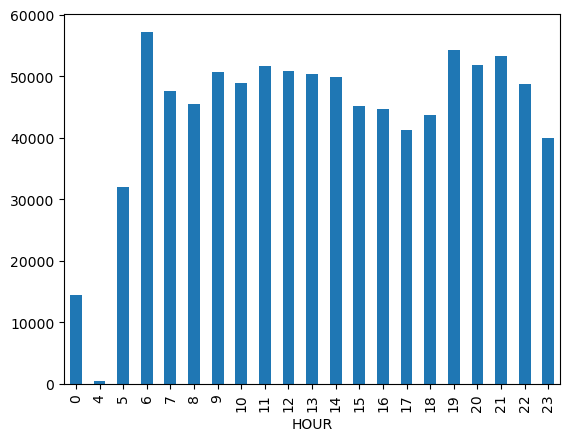

In [81]:
wego_3_headway.plot.bar()

In [82]:
wego_3_headway_day = wego_3_headway_percent.groupby('DAYS')['ACTUAL_HDWY'].sum()

<Axes: xlabel='DAYS'>

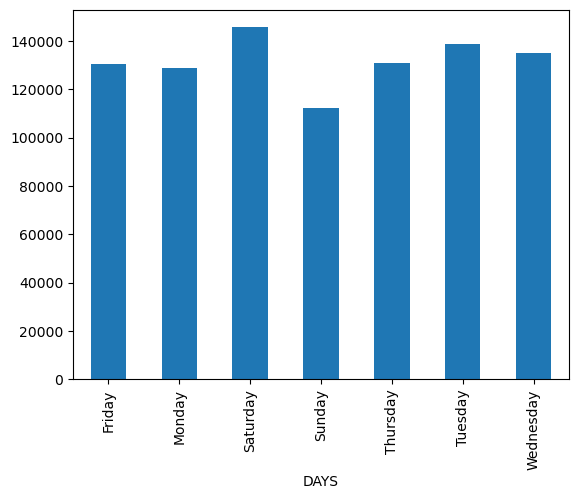

In [83]:
wego_3_headway_day.plot.bar()

In [84]:
wego_3_routes_early = wego_3.groupby('ROUTE_ABBR')['ADJUSTED_EARLY_COUNT'].sum()
wego_3_routes_late = wego_3.groupby('ROUTE_ABBR')['ADJUSTED_LATE_COUNT'].sum()
wego_3_routes_on_time = wego_3.groupby('ROUTE_ABBR')['ADJUSTED_ONTIME_COUNT'].sum()

In [85]:
wego_3_routes = pd.concat([wego_3_routes_early,wego_3_routes_late ], axis=1, join="inner")

In [86]:
wego_3_routes_1 = pd.concat([wego_3_routes,wego_3_routes_on_time ], axis=1, join="inner")

In [87]:
wego_3_routes_1

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
ROUTE_ABBR,,,
3,1382,9590,34516
7,433,3417,13417
22,631,2065,22492
23,1286,3230,35137
50,1207,5113,36309
52,1553,10038,37736
55,1531,16748,42080
56,1752,8837,48361


<Axes: xlabel='ROUTE_ABBR'>

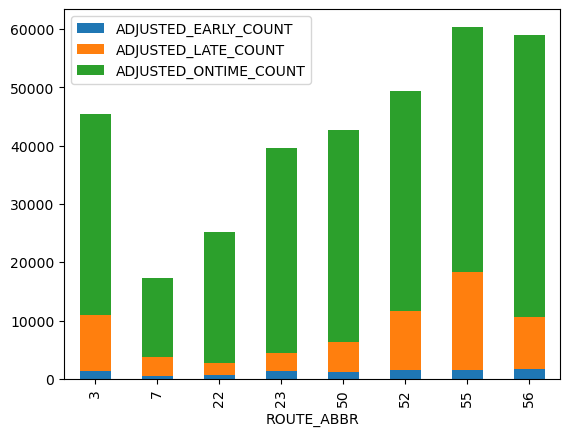

In [88]:
wego_3_routes_1.plot.bar(stacked=True)

In [89]:
wego_3_4 = wego_3

In [90]:
wego_3_4['TOTAL'] = wego_3['ADJUSTED_ONTIME_COUNT'].count()

wego_3_4['percentage_early'] = (wego_3_4['ADJUSTED_EARLY_COUNT'] / wego_3_4['TOTAL']) * 100
wego_3_4['percentage_late'] = (wego_3_4['ADJUSTED_LATE_COUNT'] / wego_3_4['TOTAL']) * 100
wego_3_4['percentage_on_time'] = (wego_3_4['ADJUSTED_ONTIME_COUNT'] / wego_3_4['TOTAL']) * 100

In [91]:
wego_3_4

,ROUTE_ABBR,DATE,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,TIME,HOUR,DAYS,headway_percentage,TOTAL,percentage_early,percentage_late,percentage_on_time
0,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:42:00,4,Tuesday,NaN,350329,0.0,0.000000,0.000285
1,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:46:00,4,Tuesday,NaN,350329,0.0,0.000000,0.000285
2,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 04:54:00,4,Tuesday,NaN,350329,0.0,0.000000,0.000285
3,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 05:10:00,5,Tuesday,NaN,350329,0.0,0.000000,0.000285
4,22,2023-08-01,NaN,NaN,0,0,1,2024-09-19 05:15:00,5,Tuesday,NaN,350329,0.0,0.000000,0.000285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,7,2023-09-30,35.266666,5.266666,0,1,0,2024-09-19 22:23:00,22,Saturday,14.933836,350329,0.0,0.000285,0.000000
350325,7,2023-09-30,NaN,NaN,0,1,0,2024-09-19 22:38:00,22,Saturday,NaN,350329,0.0,0.000285,0.000000
350326,7,2023-09-30,31.866666,1.866666,0,0,1,2024-09-19 22:45:00,22,Saturday,5.857739,350329,0.0,0.000000,0.000285
350327,7,2023-09-30,47.500000,17.500000,0,1,0,2024-09-19 22:59:00,22,Saturday,36.842105,350329,0.0,0.000285,0.000000


In [ ]:
wego_3_4.plot(kind='pie', y='percentage_early')
wego_3_4.plot(kind='pie', y='percentage_late')
wego_3_4.plot(kind='pie', y='percentage_on_time')

In [ ]:
wego_3_routes_1['TOTAL'] = wego_3['ADJUSTED_ONTIME_COUNT'].count()

wego_3_routes_1['percentage_early'] = (wego_3_routes_1['ADJUSTED_EARLY_COUNT'] / wego_3_routes_1['TOTAL']) * 100
wego_3_routes_1['percentage_late'] = (wego_3_routes_1['ADJUSTED_LATE_COUNT'] / wego_3_routes_1['TOTAL']) * 100
wego_3_routes_1['percentage_on_time'] = (wego_3_routes_1['ADJUSTED_ONTIME_COUNT'] / wego_3_routes_1['TOTAL']) * 100

In [ ]:
wego_3_routes_1

In [ ]:
wego_3_routes_1.plot(kind='pie', y='percentage_early')
wego_3_routes_1.plot(kind='pie', y='percentage_late')
wego_3_routes_1.plot(kind='pie', y='percentage_on_time')

In [ ]:
#wego_loop = wego
#wego_loop

In [ ]:
#bus_drivers = wego_loop['OPERATOR'].unique()

In [ ]:
#bus_driver_dict = dict.fromkeys(bus_drivers, [])

In [ ]:
#bus_driver_dict

In [ ]:
# for driver, trips in bus_driver_dict.items():
#      #   print(driver)
#     for row, value in wego_loop.iterrows():
#         if value.OPERATOR == driver:
#             if value.TRIP_ID in trips:
#                 pass
#             else:
#                 bus_driver_dict[driver].append(value.TRIP_ID)